# Home 3: Build a CNN for image recognition.

### Name: Weronika Zamlynny

I pledge my honor that I have abided by the Stevens Honor System.


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accuracy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


170500096/170498071 [==============================] - 40s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [14]:
import numpy as np

In [29]:
def to_one_hot(y, num_class=10):
    temp = np.zeros((y.shape[0], num_class))
    for i, val in enumerate(y):
        # val is still an array of one element
        temp[i, val[0]] = 1
    return temp

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [19]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

# TODO

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [30]:
from keras import optimizers

learning_rate = 1E-5 # to be tuned!
learning_rate = 1E-10

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [31]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 35s 872us/step - loss: 1.1302 - acc: 0.6125 - val_loss: 1.1786 - val_acc: 0.6048
Epoch 2/10
40000/40000 [==============================] - 34s 856us/step - loss: 1.1301 - acc: 0.6125 - val_loss: 1.1785 - val_acc: 0.6048
Epoch 3/10
40000/40000 [==============================] - 32s 802us/step - loss: 1.1301 - acc: 0.6125 - val_loss: 1.1785 - val_acc: 0.6048
Epoch 4/10
40000/40000 [==============================] - 31s 764us/step - loss: 1.1301 - acc: 0.6125 - val_loss: 1.1785 - val_acc: 0.6048
Epoch 5/10
40000/40000 [==============================] - 34s 862us/step - loss: 1.1301 - acc: 0.6125 - val_loss: 1.1784 - val_acc: 0.6048
Epoch 6/10
40000/40000 [==============================] - 30s 758us/step - loss: 1.1300 - acc: 0.6125 - val_loss: 1.1784 - val_acc: 0.6048
Epoch 7/10
40000/40000 [==============================] - 37s 918us/step - loss: 1.1300 - acc: 0.6125 - val_loss: 1.

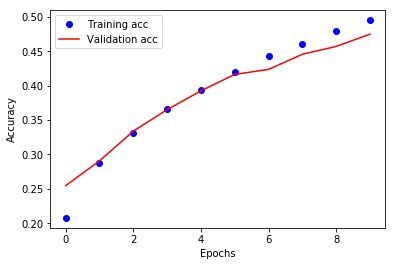

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1. Initial results (learning_rate = 1E-5):  
    - loss: 1.5703 - acc: 0.4949 - val_loss: 1.7100 - val_acc: 0.4746
    
2. (learning rate = 1E-10)
    - loss: 1.1299 - acc: 0.6125 - val_loss: 1.1783 - val_acc: 0.6048
    - increased validation accuracy, both val and training acc are still increasing

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [25]:
# <Compile your model again (using the same hyper-parameters)>
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [26]:
# <Train your model on the entire training set (50K samples)>
# <Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
# <Do NOT use the validation_data option (because now you do not have validation data)>
...
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 37s 741us/step - loss: 1.5332 - acc: 0.5056
Epoch 2/10
50000/50000 [==============================] - 44s 874us/step - loss: 1.4661 - acc: 0.5196
Epoch 3/10
50000/50000 [==============================] - 37s 731us/step - loss: 1.4084 - acc: 0.5346
Epoch 4/10
50000/50000 [==============================] - 36s 721us/step - loss: 1.3592 - acc: 0.5480
Epoch 5/10
50000/50000 [==============================] - 36s 727us/step - loss: 1.3170 - acc: 0.5567
Epoch 6/10
50000/50000 [==============================] - 37s 734us/step - loss: 1.2767 - acc: 0.5727
Epoch 7/10
50000/50000 [==============================] - 37s 734us/step - loss: 1.2414 - acc: 0.5824
Epoch 8/10
50000/50000 [==============================] - 37s 738us/step - loss: 1.2109 - acc: 0.5895
Epoch 9/10
50000/50000 [==============================] - 38s 765us/step - loss: 1.1793 - acc: 0.6006
Epoch 10/10
50000/50000 [==============================] - 38s 756us/step - loss: 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [27]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 2s 206us/step
loss = 1.378721623802185
accuracy = 0.5494
